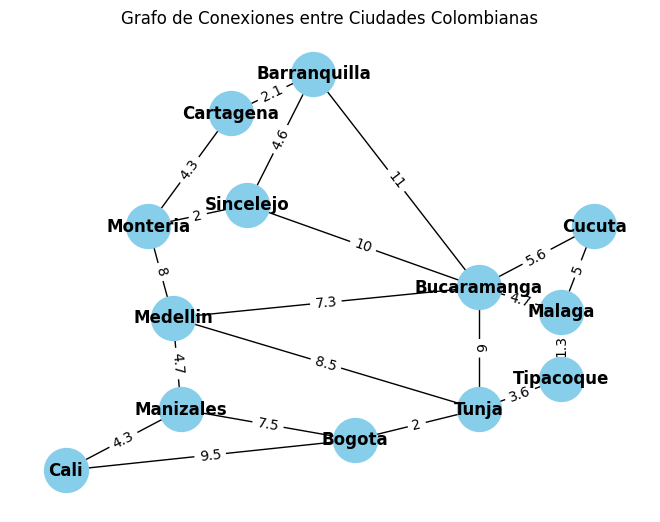

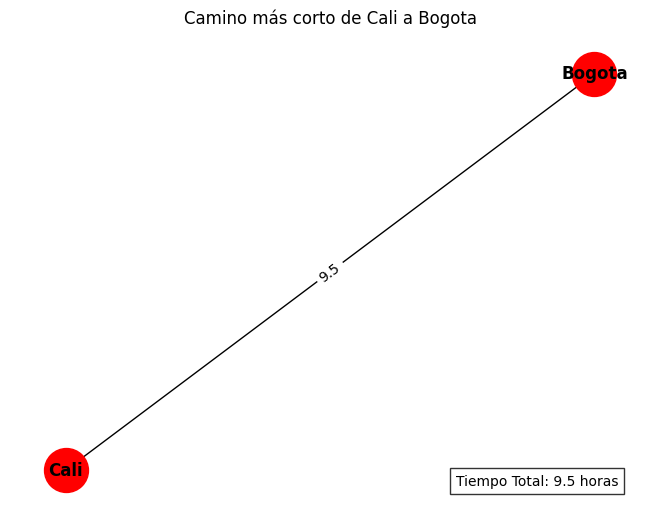

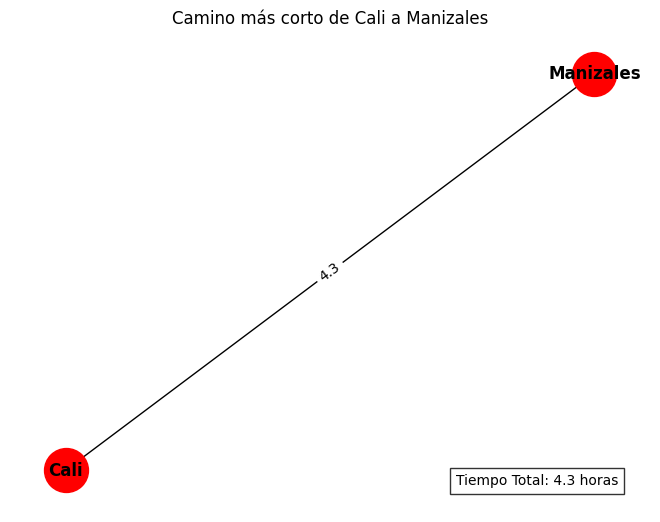

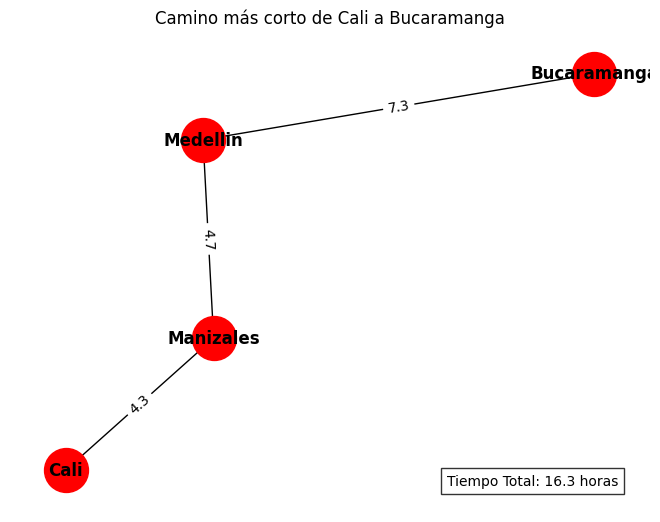

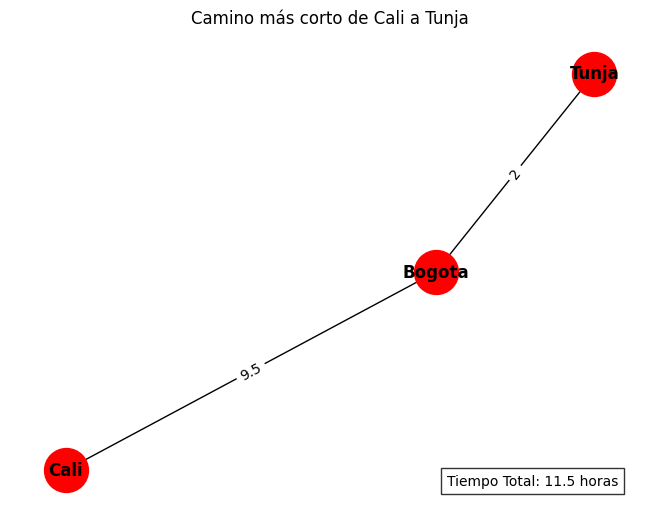

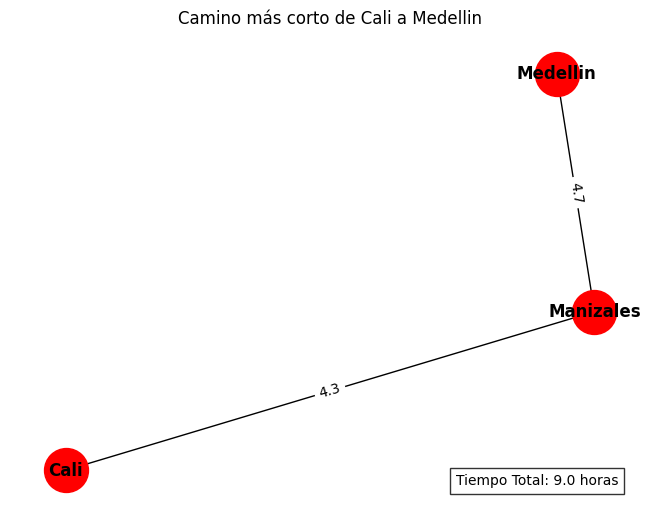

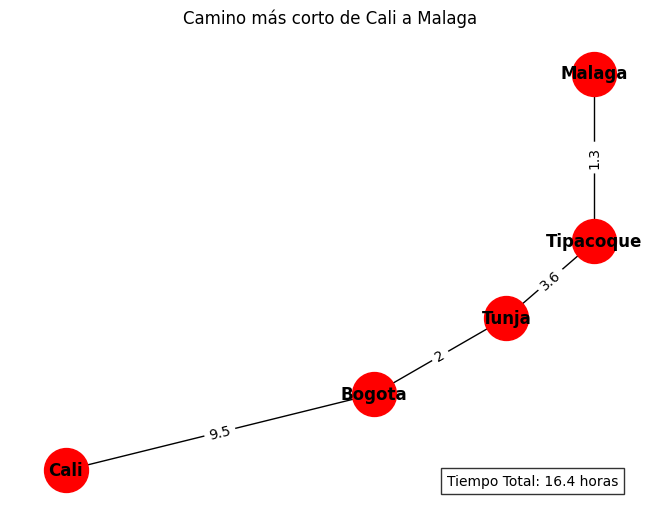

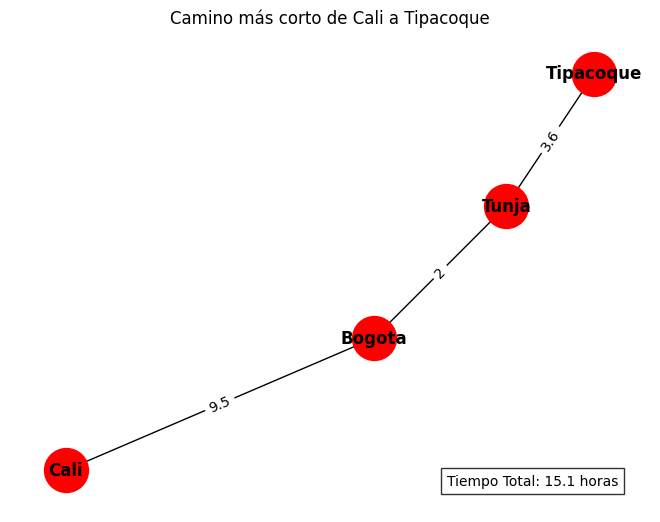

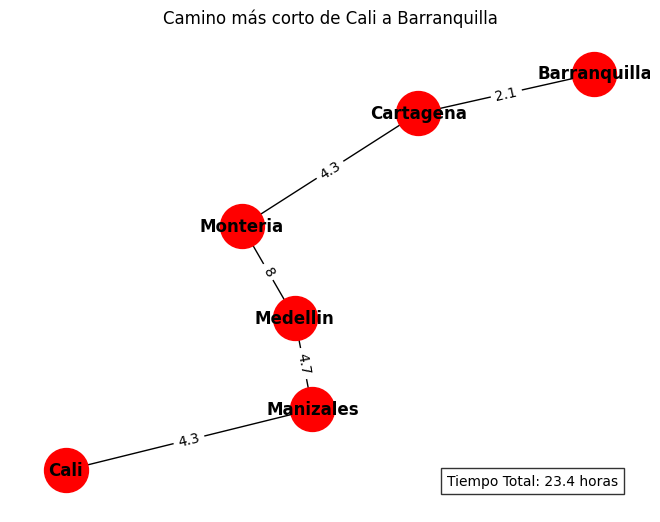

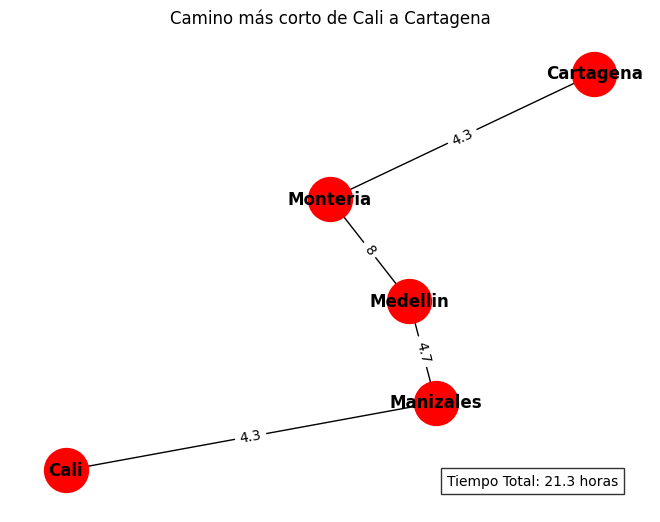

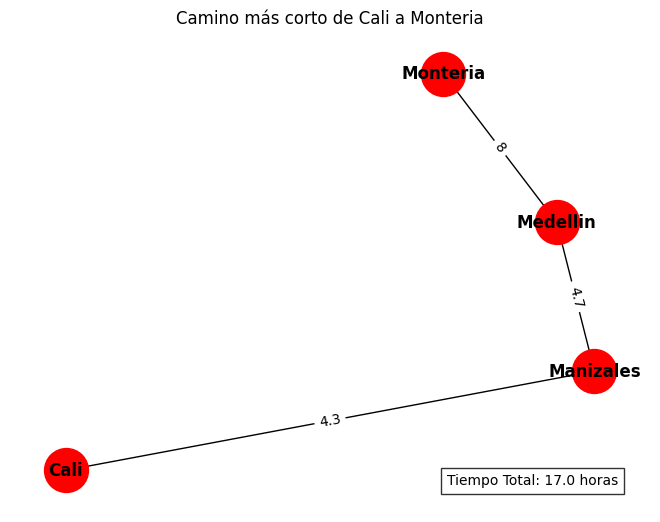

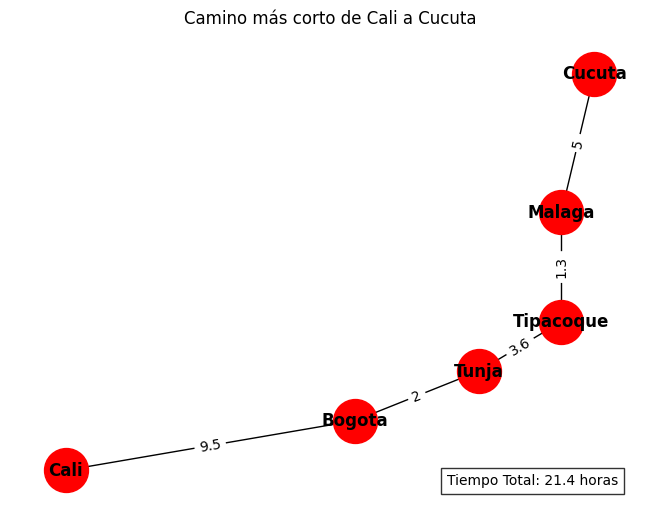

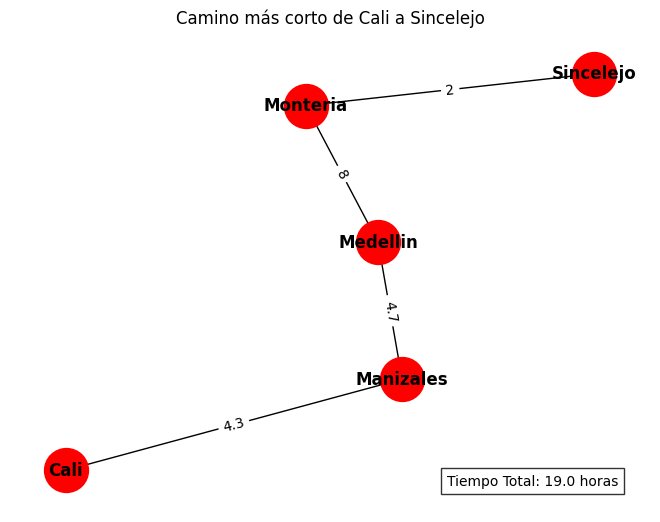

In [ ]:
# Importación de las librerias que se van a utilizar
import networkx as nx
import matplotlib.pyplot as plt

# Función para crear el grafo
def crear_grafo():
    # Lista de ciudades
    ciudades = [
        "Bucaramanga", "Tunja", "Bogota", "Manizales", "Medellin", "Cali",
        "Malaga", "Tipacoque", "Barranquilla", "Cartagena", "Monteria", "Cucuta", "Sincelejo"
    ]

    # Diccionario de tiempos de viaje entre ciudades
    tiempos_viaje = {
        # Tuplas con ciudades como llave y tiempo como valor
        ("Bucaramanga", "Tunja"): 6,
        ("Bucaramanga", "Malaga"): 4.7,
        ("Bucaramanga", "Cucuta"): 5.6,
        ("Bucaramanga", "Sincelejo"): 10,
        ("Sincelejo", "Monteria"): 2,
        ("Bucaramanga", "Barranquilla"): 11,
        ("Bucaramanga", "Medellin"): 7.3,
        ("Cucuta", "Malaga"): 5,
        ("Cartagena", "Monteria"): 4.3,
        ("Barranquilla", "Cartagena"): 2.1,
        ("Sincelejo", "Barranquilla"): 4.6,
        ("Bogota", "Tunja"): 2,
        ("Bogota", "Cali"): 9.5,
        ("Bogota", "Manizales"): 7.5,
        ("Tipacoque", "Malaga"): 1.3,
        ("Tipacoque", "Tunja"): 3.6,
        ("Cali", "Manizales"): 4.3,
        ("Medellin", "Tunja"): 8.5,
        ("Medellin", "Monteria"): 8,
        ("Medellin", "Manizales"): 4.7
    }

    # Diccionario de posiciones de las ciudades para visualización
    posiciones = {
        # Nombre de la ciudad: coordenadas (x, y)
        "Bucaramanga": (5, 6),
        "Tunja": (5, 2),
        "Bogota": (3.5, 1),
        "Manizales": (1.4, 2),
        "Medellin": (1.3, 5),
        "Cali": (0, 0),
        "Malaga": (6, 5.2),
        "Tipacoque": (6, 3),
        "Barranquilla": (3, 13),
        "Cartagena": (2, 11.7),
        "Monteria": (1, 8),
        "Cucuta": (6.4, 8),
        "Sincelejo": (2.2, 8.7)
    }


# Crear un grafo vacío
    G = nx.Graph()

    # Agregar nodos al grafo
    for ciudad in ciudades:
        G.add_node(ciudad, pos=posiciones[ciudad])

    # Agregar aristas (con pesos) al grafo
    for edge, weight in tiempos_viaje.items():
        ciudad_a, ciudad_b = edge
        G.add_edge(ciudad_a, ciudad_b, weight=weight)

    return G, posiciones, tiempos_viaje

def crear_grafo():
    # (Mismo código del grafo, tiempos_viaje, posiciones)

    return G, posiciones, tiempos_viaje

# Función para obtener todos los caminos más cortos usando Floyd-Warshall
def obtener_todos_los_caminos(G):
    return nx.floyd_warshall(G)

# Función para mostrar los caminos más cortos desde un origen dado hacia todos los demás destinos en el grafo.
def mostrar_caminos_desde_origen(origen, todos_los_caminos, posiciones, tiempos_viaje):
    for destino, distancia in todos_los_caminos[origen].items():
        if destino != origen and distancia != float('inf'):
            # Obtener el camino usando shortest_path
            path = nx.shortest_path(G, origen, destino, weight='weight')
            tiempo_total = sum(tiempos_viaje.get((path[i], path[i + 1]), tiempos_viaje.get((path[i + 1], path[i]))) for i in range(len(path) - 1))

            # Redondear el tiempo total a dos decimales
            tiempo_total_redondeado = round(tiempo_total, 2)

            # Crear un subgrafo con el camino más corto
            G_camino = G.subgraph(path)

            # Obtener las etiquetas de las aristas del camino
            edge_labels = {(path[i], path[i + 1]): tiempos_viaje.get((path[i], path[i + 1]), tiempos_viaje.get((path[i + 1], path[i]))) for i in range(len(path) - 1)}

            # Mostrar grafo del camino corto con etiqueta de tiempo total redondeado en la esquina inferior derecha
            nx.draw(G_camino, pos=posiciones, with_labels=True, node_size=1000, node_color='red', font_weight='bold')
            nx.draw_networkx_edge_labels(G_camino, pos=posiciones, edge_labels=edge_labels, font_color='black')
            # Agregar etiqueta con tiempo total redondeado en la esquina inferior derecha
            plt.text(0.95, 0.05, f"Tiempo Total: {tiempo_total_redondeado} horas", horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
            plt.title(f'Camino más corto de {origen} a {destino}')
            plt.show()
            print("\n")  # Agregar un espacio entre gráficos

# Obtener el grafo y datos necesarios
grafo_datos = crear_grafo()

# Extraer datos del grafo
if grafo_datos is not None:
    G, posiciones, tiempos_viaje = grafo_datos

    # Mostrar grafo original
    nx.draw(G, pos=posiciones, with_labels=True, node_size=1000, node_color='skyblue', font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos=posiciones, edge_labels=tiempos_viaje)
    plt.title('Grafo de Conexiones entre Ciudades Colombianas')
    plt.show()
    print("\n")  # Agregar un espacio entre gráficos

    # Obtener todos los caminos más cortos usando Floyd-Warshall
    todos_los_caminos = obtener_todos_los_caminos(G)

    # Definir ciudad de origen
    ciudad_origen = "Cali"

    # Mostrar camino más corto desde la ciudad de origen a todas las demás ciudades
    mostrar_caminos_desde_origen(ciudad_origen, todos_los_caminos, posiciones, tiempos_viaje)
else:
    print("Error al crear el grafo. Verifica los datos de entrada.")